# Haberman's Survival Data Assignment


 The Haberman's dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Attribute Information:

    Age of patient at time of operation (numerical)
    Patient's year of operation (year - 1900, numerical)
    Number of positive axillary nodes detected (numerical)
    Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
 

### Objective :- 
    Find the model to classify the Patient Survival from the given attributes 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
'''Reading the Haberman's Data'''
#Load haberman.csv into a pandas dataFrame.
#To read the data from the specified convert the data file path from normal string to raw string
Haber = pd.read_csv(r"C:\Users\TEJA\Desktop\DATA SCi\my work\habermans-survival-data-set\haberman.csv")

#### View the dataframe shape and colums details

In [2]:
print (Haber.shape)
print (Haber.columns)

(305, 4)
Index(['30', '64', '1', '1.1'], dtype='object')


In [3]:
### Adding headder to the Haber dataframe
Haber.columns=["Age","Operation_year","axil_nodes","Surv_Status"]

In [4]:
print (Haber.columns)


Index(['Age', 'Operation_year', 'axil_nodes', 'Surv_Status'], dtype='object')


In [5]:
Haber.head(5)

,Age,Operation_year,axil_nodes,Surv_Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
Haber.describe()

,Age,Operation_year,axil_nodes,Surv_Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observation :-

    1.The Age tells us the Dataset is between the Age the age group (30-83) with an average age of 52
    2.The Data set has been collected during the time priod (58-69) 12 years of data 
    3.The positive axillary nodes are ranging from (0-52) looking at the 75% value and the Max there should be some
    data currepted
    4.The survival status has only two values 1 and 2


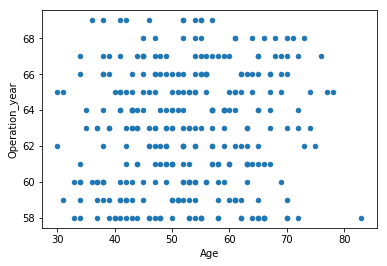

In [7]:
Haber.plot(kind='Scatter',x='Age',y='Operation_year') 
plt.show()

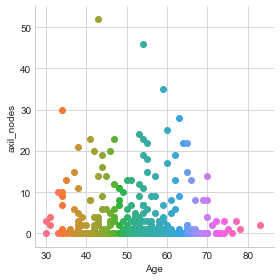

In [8]:
sns.set_style("whitegrid")
sns.FacetGrid(Haber,hue='Age',size=4)\
  .map(plt.scatter,"Age","axil_nodes")
plt.show()

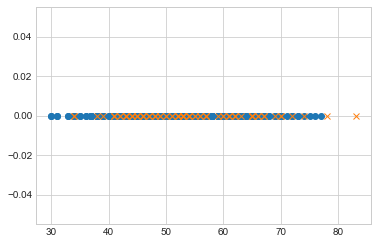

In [10]:
import numpy as np
Haber["Surv_Status"] = Haber["Surv_Status"].apply(lambda y: "Survived" if y == 1 else "Died")
Survive_long=Haber.loc[Haber["Surv_Status"] == "Survived"]
Survive_short=Haber.loc[Haber["Surv_Status"] == "Died"]
plt.plot(Survive_long["Age"],np.zeros_like(Survive_long['axil_nodes']),'o')
plt.plot(Survive_short["Age"],np.zeros_like(Survive_short['axil_nodes']),'x')
plt.show()

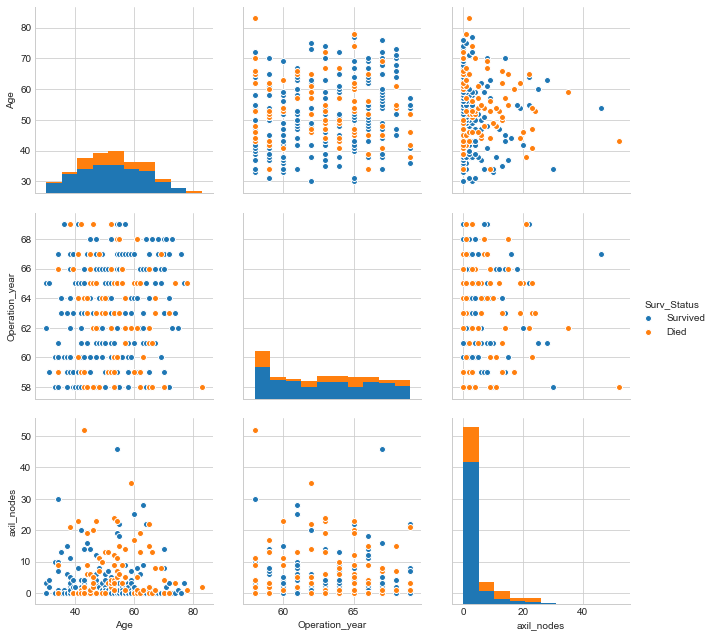

In [11]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(Haber,hue='Surv_Status',size=3)

plt.show()

### Observation:

We are not able to clearly seperate the Survival catagory but looking at the axillary nodes plot graph it is showing some better classification

In [12]:
Survive_long.describe()

,Age,Operation_year,axil_nodes
count,224.000000,224.000000,224.000000
mean,52.116071,62.857143,2.799107
std,10.937446,3.229231,5.882237
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [13]:
Survive_short.describe()

,Age,Operation_year,axil_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


### Observation :-

Looking at the data above we can clearly say that axillary nodes is much differed between the two catagories

    1.Though the Pactients survived long has the axillary nodes max as 46 25%-75% of the pactients survived has the
       rage of [0-3]   axillary nodes 
    2.The Pactients Survived short has the axillary nodes rage  [0-11] observing the the 25%-75%

We can Build a simple model on the axillary nodes to by if else codition to say all the patients with less than the 3 can Survive more than 5 years further we can look at the other attribute combinations to improvise our model 

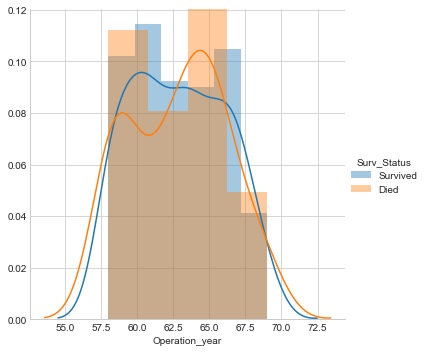

In [14]:
sns.FacetGrid(Haber,hue="Surv_Status",size=5)\
    .map(sns.distplot,"Operation_year")\
    .add_legend()
plt.show()

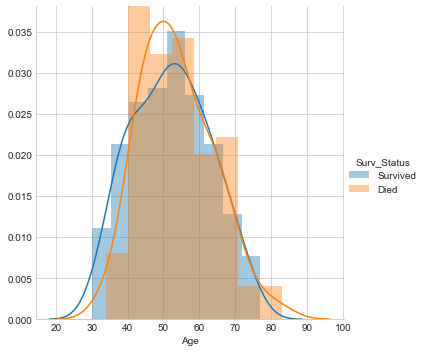

In [15]:
sns.FacetGrid(Haber,hue="Surv_Status",size=5)\
    .map(sns.distplot,"Age")\
    .add_legend()
plt.show()

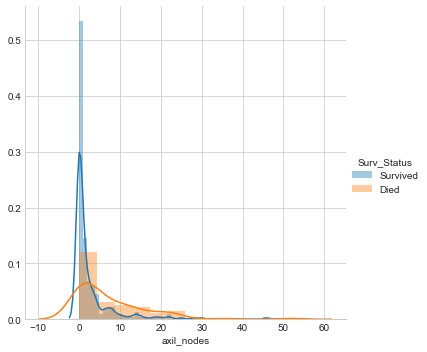

In [16]:
sns.FacetGrid(Haber,hue="Surv_Status",size=5)\
    .map(sns.distplot,"axil_nodes")\
    .add_legend()
plt.show()

### Observation:-
FacetGrid dosen't provide much information on the age and the operation year but by looking at the Axil nodes we can clearly say that the Survived percentage is high when the axil node value is some were  between 0-5 


[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


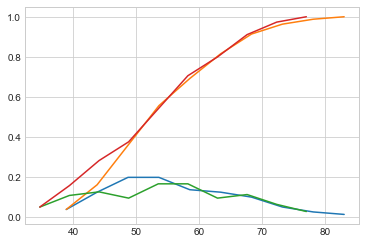

In [17]:
#Plot CDF of Survive_Status

# Survive_short
counts, bin_edges = np.histogram(Survive_short['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
 

#Survive_long
counts, bin_edges = np.histogram(Survive_long['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


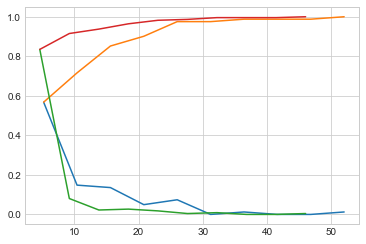

In [18]:
#Plot CDF of Survive_Status

# Survive_short
counts, bin_edges = np.histogram(Survive_short['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
 

#Survive_long
counts, bin_edges = np.histogram(Survive_long['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


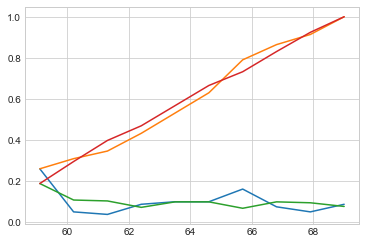

In [19]:
# virginica
counts, bin_edges = np.histogram(Survive_short['Operation_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
 

#versicolor
counts, bin_edges = np.histogram(Survive_long['Operation_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

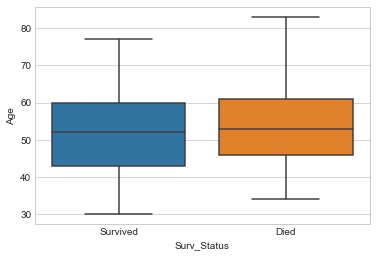

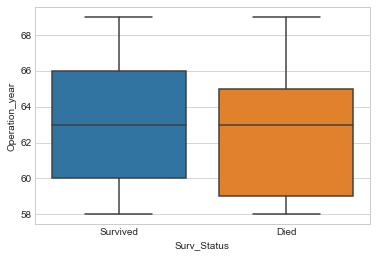

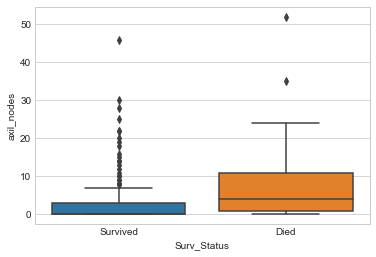

In [20]:
sns.boxplot(x='Surv_Status',y='Age', data=Haber)
plt.show()
sns.boxplot(x='Surv_Status',y='Operation_year', data=Haber)
plt.show()
sns.boxplot(x='Surv_Status',y='axil_nodes', data=Haber)
plt.show()

### Observation:-

    1.The patients treated after 1966 have higher chance to surive than the rest
    2. Age group of 30 -34 are in the survived region 
    3.Age group of the 78-83 are in dead reagion 

### Final Thoughts:-

The Dataset is an imbalanced dataset and based on the observations we can build a model with the below conditions for chances of Survival and Non Survival 

Survival :-
    
    1.Axillary nodes value less than 3 Can  survive
    2.Axillary nodes value less than 3 and treated after 1966 has higher chance to Survive 
    3.Axillary nodes value less than 3 and treated after 1966 and patient's with in the age less than 34 
    Can definitely Survive
    
Non Survival:-

    1.Axillary nodes value grater than 3 chances of surviving  is less
    2.Axillary nodes value grater than 3 and treated before 1966 has veryless chances of surviving 
    3.Axillary nodes value grater than 3 and treated before 1966 and patient's with age gretar than 83
    definitely Can't Survive
